# Low priced stocks

In [1]:
import requests

url='https://www.moneycontrol.com/stocks/marketstats/bse-mostactive-stocks/low-price-high-volume-98/'

page=requests.get(url)

from bs4 import BeautifulSoup

soup=BeautifulSoup(page.content,'html.parser')
# print(soup)

In [2]:
s_table=soup.findAll('div',class_='bsr_table hist_tbl_hm')
s_table=s_table[0]
# print(s_table)

<div class="bsr_table hist_tbl_hm">
<table border="0" cellpadding="0" cellspacing="0" width="100%">
<thead>
<tr>
<th align="left" class="TAL" width="300"><a href="/stocks/marketstats/mostactive.php?optex=BSE&amp;opttopic=mostactive&amp;sort=name&amp;index=98&amp;order=" style="color:#fff">Company Name</a></th>
<th width="175">Group</th>
<th width="175">High</th>
<th width="180">Low</th>
<th width="185">Last Price</th>
<th width="175">% Chg</th>
<th width="175"><a href="/stocks/marketstats/mostactive.php?optex=BSE&amp;opttopic=mostactive&amp;index=98&amp;sort=val&amp;order=1" style="color:#fff"><b>Value</b></a> <font face="arial" size="1">(Rs. cr.)</font></th>
<th class="PR" width="300"><span id="th_name">5 Day Performance</span>
<div class="dropdownchng"> <span class="bluarw MT10 MR2"></span>
<ul>
<li><a href="javascript:;" onclick="display('performance');">5 Day Performance</a></li>
<li><a href="javascript:;" onclick="display('vol');">Volume</a></li>
<li><a href="javascript:;" onclick

In [3]:
s_head=s_table.findAll('th')
s_head=[i.text.strip() for i in s_head]
s_head=s_head[:7]
print(s_head)


['Company Name', 'Group', 'High', 'Low', 'Last Price', '% Chg', 'Value (Rs. cr.)']


In [4]:
import pandas as pd
import numpy as np

sdf=pd.DataFrame(columns=s_head)
sdf

,Company Name,Group,High,Low,Last Price,% Chg,Value (Rs. cr.)


In [5]:
def red(str):
  s=''
  for i in str:
    if i=='\n':
      break
    else:
      s+=i
  return(s)



In [6]:


name=s_table.findAll('td',class_='PR')
name=[i.text for i in name]
name
com_name=[]
for i in name:
  com_name.append(red(i))

print(type(com_name))


<class 'list'>


In [7]:
com_len=0
for i in com_name:
  com_len+=1

print(com_len)


193


In [8]:
fulldata=s_table.findAll('tr')
fulldata=fulldata[1:]
fulldata[0]
data=[]
for j in range(0,com_len*7,7):
  data.append(fulldata[j])

#print(data)

In [9]:
data_len=0
for i in data:
  data_len+=1

print(data_len)

193


In [10]:
other_data=[]
for dat in data:
  row=dat.findAll('td')
  row=row[:7]
  row=[i.text for i in row]
  other_data.append(row)
  row[0]=red(row[0])
  l_df=len(sdf)
  # print(l_df)
  sdf.loc[l_df]=row
  # print(row)

In [11]:
sdf

,Company Name,Group,High,Low,Last Price,% Chg,Value (Rs. cr.)
0,Yes Bank,A,19.65,19.20,19.31,-0.21,50.04
1,Vodafone Idea,A,13.55,13.20,13.27,1.61,41.36
2,Jaiprakash Pow,B,13.30,12.80,12.84,-1.91,15.74
3,Rattan Power,A,9.15,8.82,8.87,-0.78,10.85
4,Unitech,A,6.64,6.44,6.64,4.90,8.83
...,...,...,...,...,...,...,...
188,Amin Tannery,B2,2.28,2.16,2.21,1.38,0.01
189,Adishakti Loha,B2,11.05,11.05,11.05,0.00,0.01
190,Mohit Ind,B,18.00,17.71,17.92,0.11,0.01
191,Patron Exim,B2,8.95,8.55,8.93,4.44,0.01


In [12]:
len(sdf)

193

In [49]:
sdf.rename(columns={'% Chg':'Chg','Value (Rs. cr.)':'Value'},inplace=True)

<ipython-input-49-9614e32de2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.rename(columns={'% Chg':'Chg','Value (Rs. cr.)':'Value'},inplace=True)


In [50]:
# sdf.to_csv('loweststock.csv')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
sdf.shape

(175, 7)

Removing Duplicates

In [52]:
sdf.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Length: 175, dtype: bool

In [53]:
sdf=sdf.drop_duplicates()
sdf.shape

(175, 7)

In [54]:
temp1=sdf.duplicated()
temp1.describe()

count       175
unique        1
top       False
freq        175
dtype: object

In [55]:
#Checking for null value
sdf.isnull().sum()

Company Name    0
Group           0
High            0
Low             0
Last Price      0
Chg             0
Value           0
dtype: int64

In [56]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 192
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  175 non-null    object
 1   Group         175 non-null    object
 2   High          175 non-null    object
 3   Low           175 non-null    object
 4   Last Price    175 non-null    object
 5   Chg           175 non-null    object
 6   Value         175 non-null    object
dtypes: object(7)
memory usage: 10.9+ KB


converting Object to float type

In [81]:
sdf[['High','Low','Last Price','Chg','Value']]=sdf[['High','Low','Last Price','Chg','Value']].astype(str).astype(float)

In [83]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 192
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  175 non-null    object 
 1   Group         175 non-null    object 
 2   High          175 non-null    float64
 3   Low           175 non-null    float64
 4   Last Price    175 non-null    float64
 5   Chg           175 non-null    float64
 6   Value         175 non-null    float64
dtypes: float64(5), object(2)
memory usage: 10.9+ KB


In [84]:
sdf.value_counts()

Company Name     Group  High   Low    Last Price  Chg    Value
A2Z Infra Eng    B      10.49  10.49  10.49       -1.96  0.09     1
SEACOAST SS      B2     2.77   2.64   2.76         4.55  4.67     1
Rattan Power     A      9.15   8.82   8.87        -0.78  10.85    1
Reliance Comm    A      1.80   1.76   1.79         1.70  0.36     1
Reliance Home F  B2     2.34   2.23   2.34         4.93  0.72     1
                                                                 ..
Hathway Cable    A      20.44  19.65  19.74       -1.45  5.95     1
Heads UP Vent    B      12.92  12.45  12.61       -1.64  0.03     1
Healthy Life     B2     4.07   3.65   3.75        -7.41  0.18     1
Hind Motors      B      17.83  17.06  17.31       -0.63  0.32     1
Zenith SP&I      B      5.90   5.90   5.90        -1.99  0.04     1
Length: 175, dtype: int64

In [85]:
sdf.describe()

,High,Low,Last Price,Chg,Value
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,9.826971,9.440000,9.618457,0.759143,1.198514
std,5.805360,5.611017,5.690573,2.904624,5.203720
min,0.380000,0.380000,0.380000,-7.410000,0.010000
25%,4.635000,4.435000,4.520000,-1.020000,0.030000
50%,9.000000,8.550000,8.870000,0.230000,0.080000
75%,14.520000,14.030000,14.440000,2.605000,0.235000
max,20.440000,19.650000,19.870000,10.140000,50.040000


In [95]:
sdf.corr()

<ipython-input-95-a4f84409b963>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sdf.corr()


,High,Low,Last Price,Chg,Value
High,1.000000,0.999008,0.999250,-0.062996,0.171405
Low,0.999008,1.000000,0.999273,-0.061979,0.175353
Last Price,0.999250,0.999273,1.000000,-0.042789,0.170531
Chg,-0.062996,-0.061979,-0.042789,1.000000,-0.026424
Value,0.171405,0.175353,0.170531,-0.026424,1.000000


<ipython-input-133-47bbb11615b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sdf.corr(),annot=True)


<Axes: >

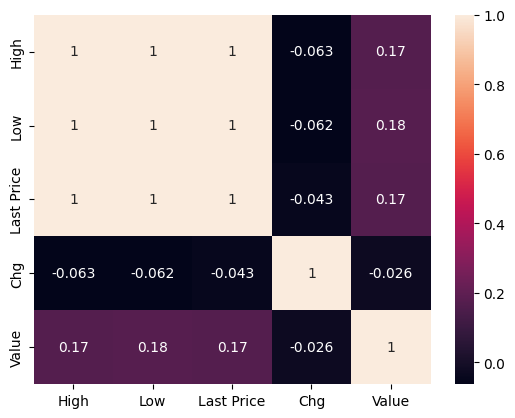

In [133]:
sns.heatmap(sdf.corr(),annot=True)

In [86]:
grp=sdf.groupby('Group')
grp.ngroups

3

Text(0.5, 1.0, 'Number of stock in each group')

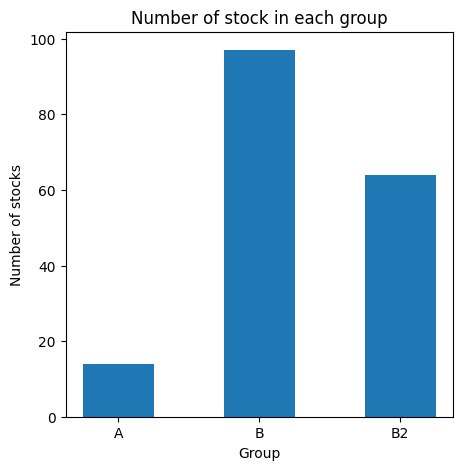

In [94]:
x=grp.size()
a=list(x.index)
b=list(x.values)

plt.figure(figsize=(5,5))
plt.bar(a,b,width=0.5)  #color='blue'
plt.xlabel('Group')
plt.ylabel('Number of stocks')
plt.title("Number of stock in each group")


<Axes: xlabel='Group'>

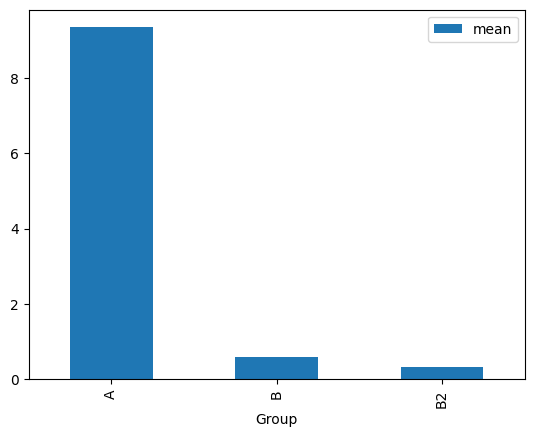

In [93]:
sdf.groupby('Group')['Value'].agg(['mean']).plot(kind='bar')


In [115]:
temp2=sdf.loc[sdf.Chg>=1]
temp2=temp2.reset_index()
temp2

,index,Company Name,Group,High,Low,Last Price,Chg,Value
0,1,Vodafone Idea,A,13.55,13.20,13.27,1.61,41.36
1,4,Unitech,A,6.64,6.44,6.64,4.90,8.83
2,10,SEACOAST SS,B2,2.77,2.64,2.76,4.55,4.67
3,11,Zee Media,B,15.59,14.82,15.23,2.56,4.12
4,16,GTL Infra,B,1.09,1.05,1.08,1.89,2.87
...,...,...,...,...,...,...,...,...
69,185,Setco Auto,B,7.77,7.77,7.77,5.00,0.01
70,187,Kaushalya Infra,B,6.98,6.85,6.98,1.90,0.01
71,188,Amin Tannery,B2,2.28,2.16,2.21,1.38,0.01
72,191,Patron Exim,B2,8.95,8.55,8.93,4.44,0.01


<ipython-input-136-010dd3e4ab91>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'plot to represent stock with there change in price percentage')

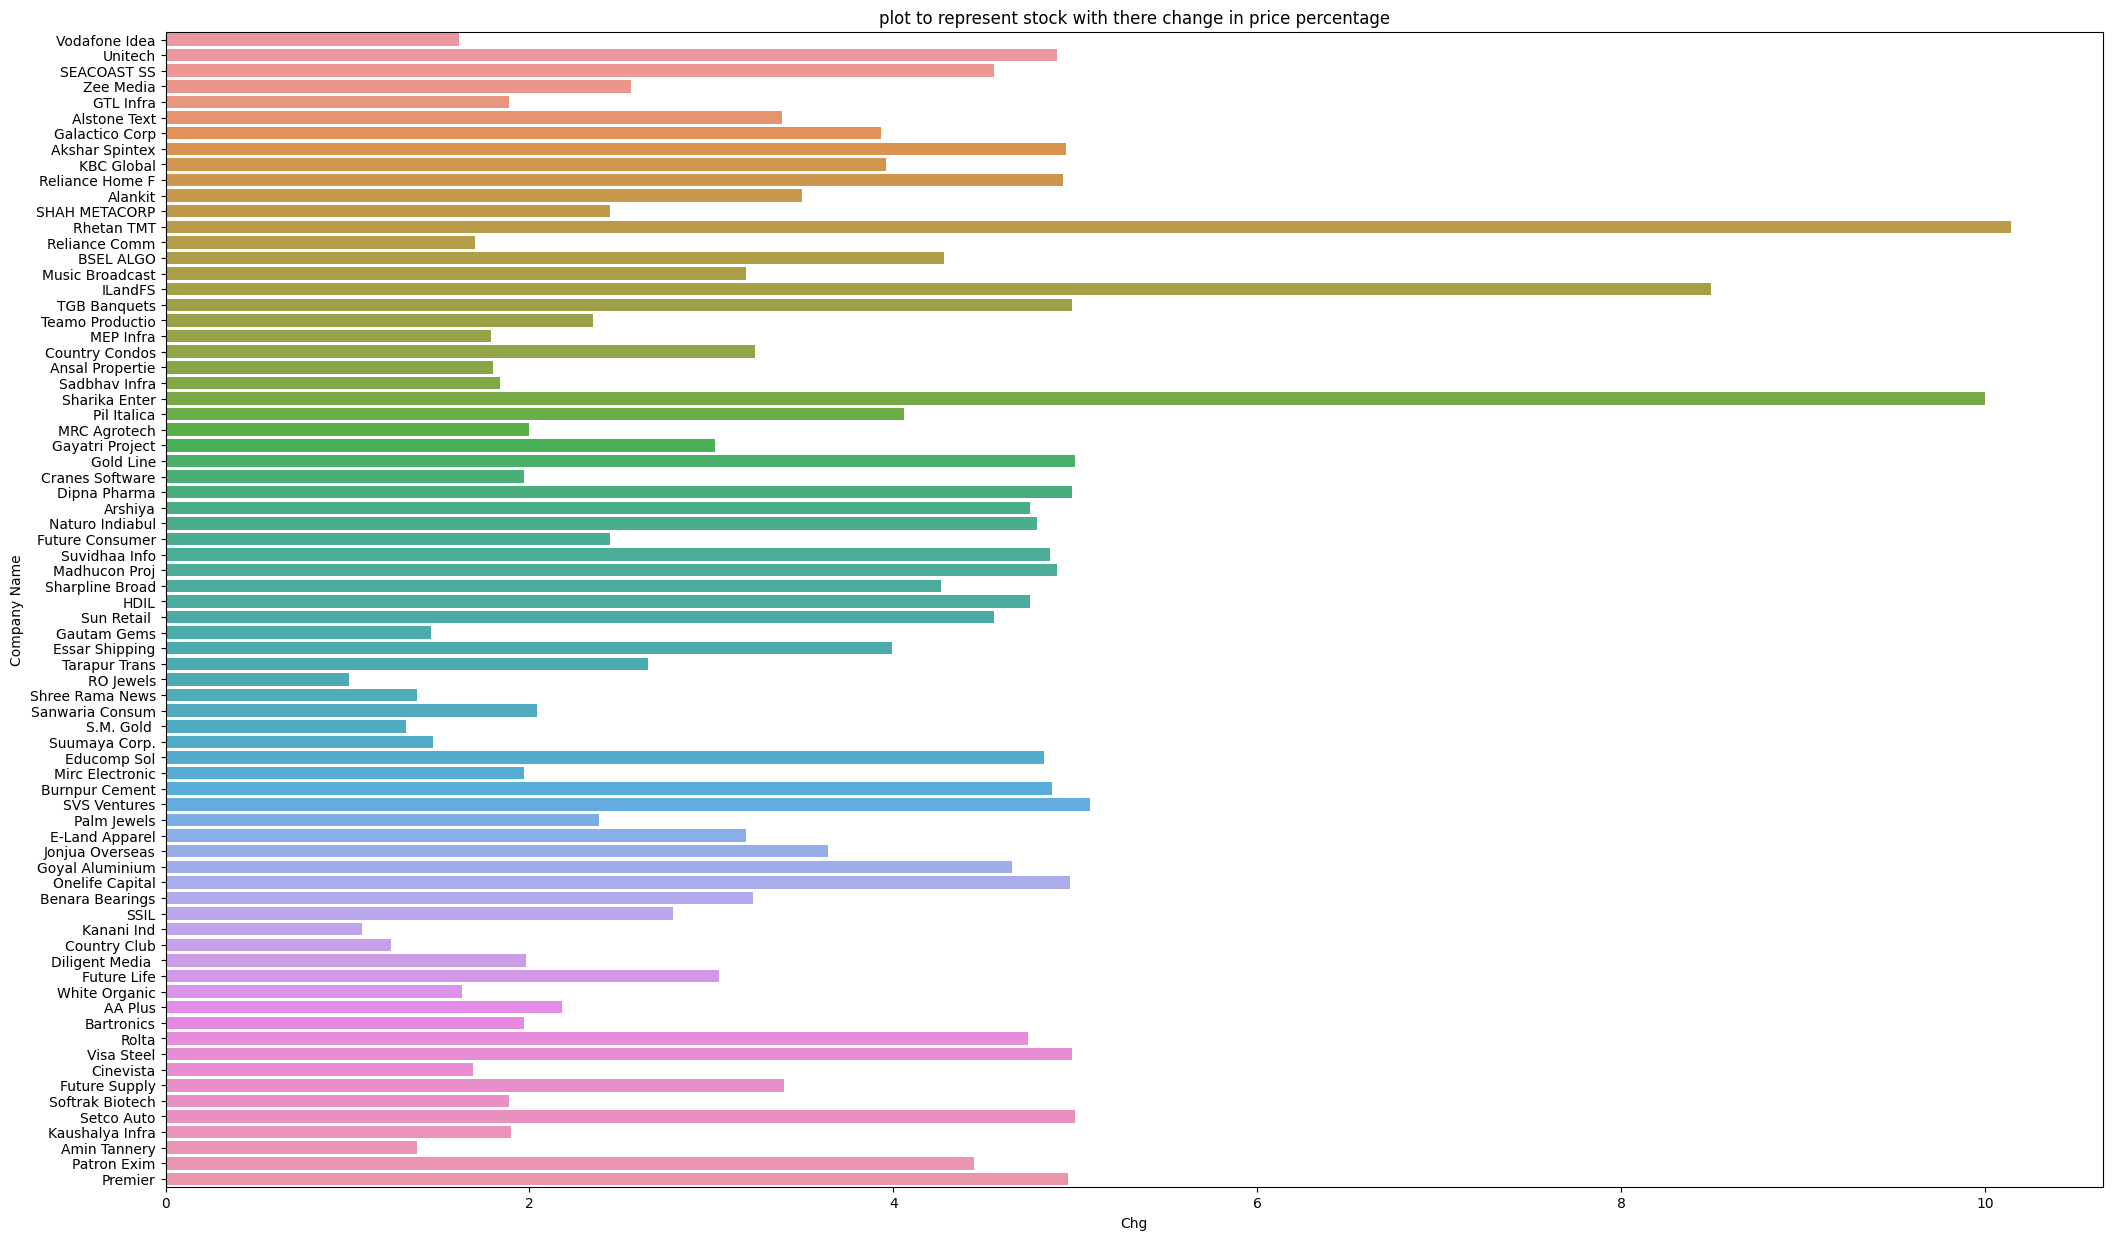

In [136]:
plt.figure(figsize=(25,15))

sns.barplot(
    ci=False,
    data=temp2,
    y='Company Name',
    x='Chg'
)
# plt.xticks(rotation=45)
plt.title('plot to represent stock with there change in price percentage')

In [116]:
temp2=temp2.drop(['index'],axis=1)

<Axes: >

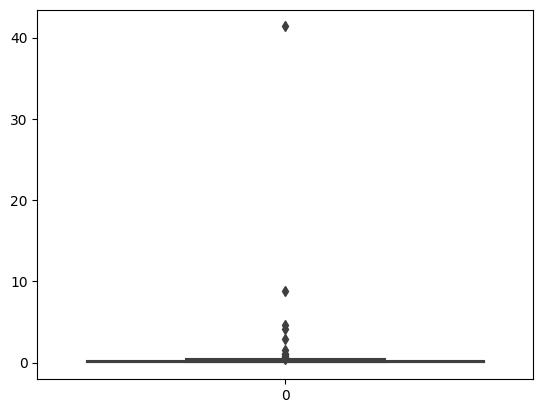

In [117]:
sns.boxplot(temp2['Value'])

<Axes: xlabel='Group'>

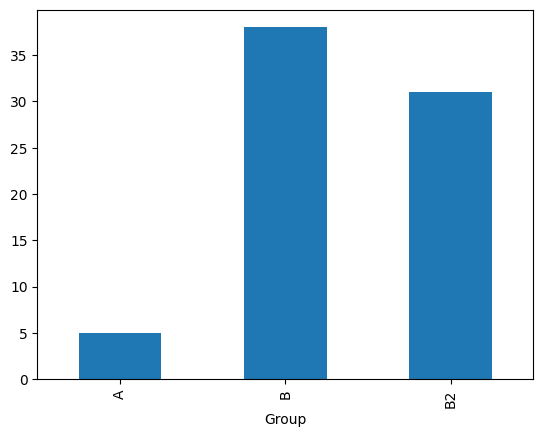

In [101]:
temp2.groupby('Group').size().plot(kind='bar')

<Axes: xlabel='Group'>

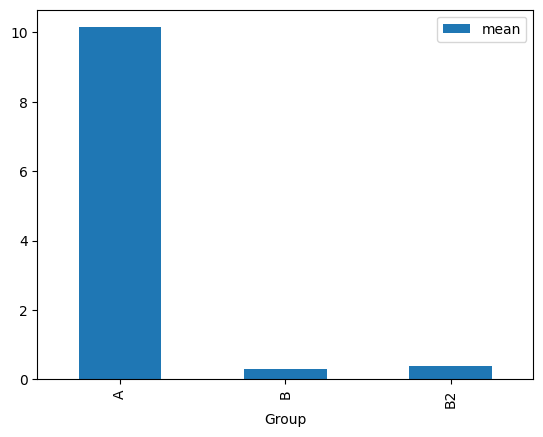

In [102]:
temp2.groupby('Group')['Value'].agg(['mean']).plot(kind='bar')

<ipython-input-104-b3b7077c52c1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(


Text(0.5, 1.0, 'Price of stock according to the value it posses')

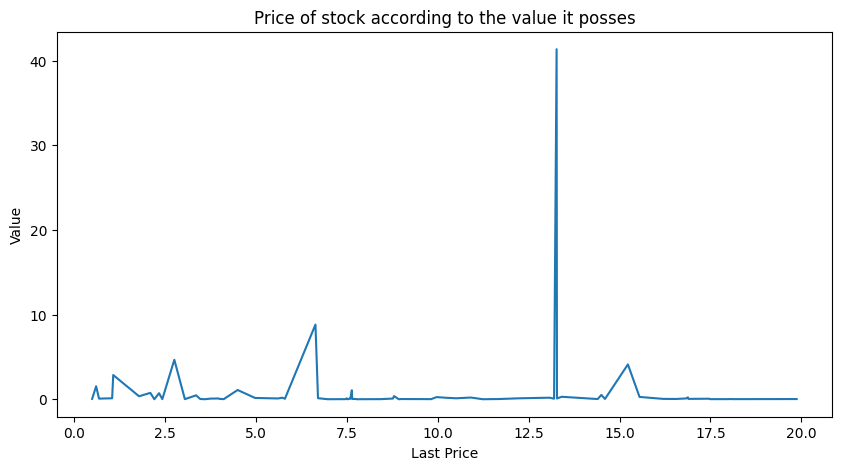

In [104]:
plt.figure(figsize=(10,5))

sns.lineplot(
    ci=False,
    data=temp2,
    x='Last Price',                     #there is no reflextion from stock price to its value
    y='Value'
)

plt.title('Price of stock according to the value it posses')

In [119]:
temp3=temp2.loc[temp2.Group=='A']
temp3


,Company Name,Group,High,Low,Last Price,Chg,Value
0,Vodafone Idea,A,13.55,13.20,13.27,1.61,41.36
1,Unitech,A,6.64,6.44,6.64,4.90,8.83
13,Reliance Comm,A,1.80,1.76,1.79,1.70,0.36
32,Future Consumer,A,0.84,0.81,0.84,2.44,0.10
36,HDIL,A,3.75,3.75,3.75,4.75,0.08


<ipython-input-123-bb6b8c2f13c7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Stock belong to Group A with have increasing in recent days')

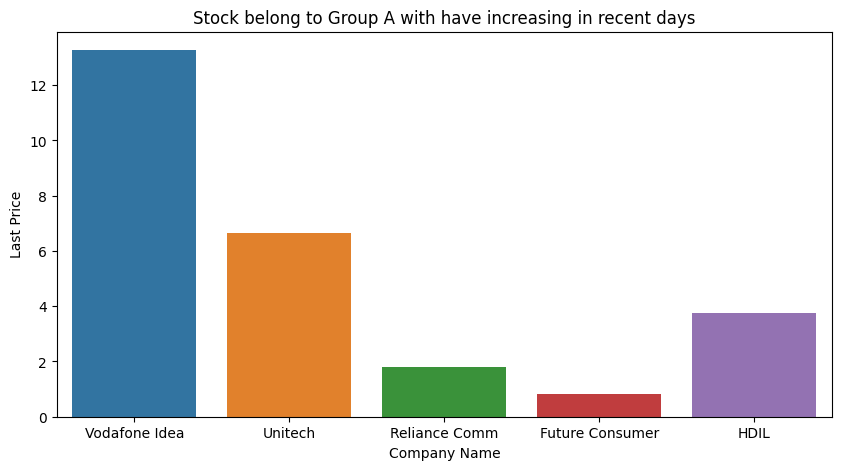

In [123]:
#Group A
plt.figure(figsize=(10,5))

sns.barplot(
    ci=False,
    data=temp3,
    x='Company Name',
    y='Last Price'
)
# plt.xticks(rotation=45)
plt.title('Stock belong to Group A with have increasing in recent days')

In [129]:
temp3=temp2.loc[temp2.Group=='B']
temp3.head()

,Company Name,Group,High,Low,Last Price,Chg,Value
3,Zee Media,B,15.59,14.82,15.23,2.56,4.12
4,GTL Infra,B,1.09,1.05,1.08,1.89,2.87
10,Alankit,B,14.64,14.05,14.50,3.50,0.52
11,SHAH METACORP,B,3.45,3.27,3.36,2.44,0.47
14,BSEL ALGO,B,13.45,12.86,13.41,4.28,0.30


<ipython-input-128-3f6b12d93871>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Stock belong to Group B with have increasing in recent days')

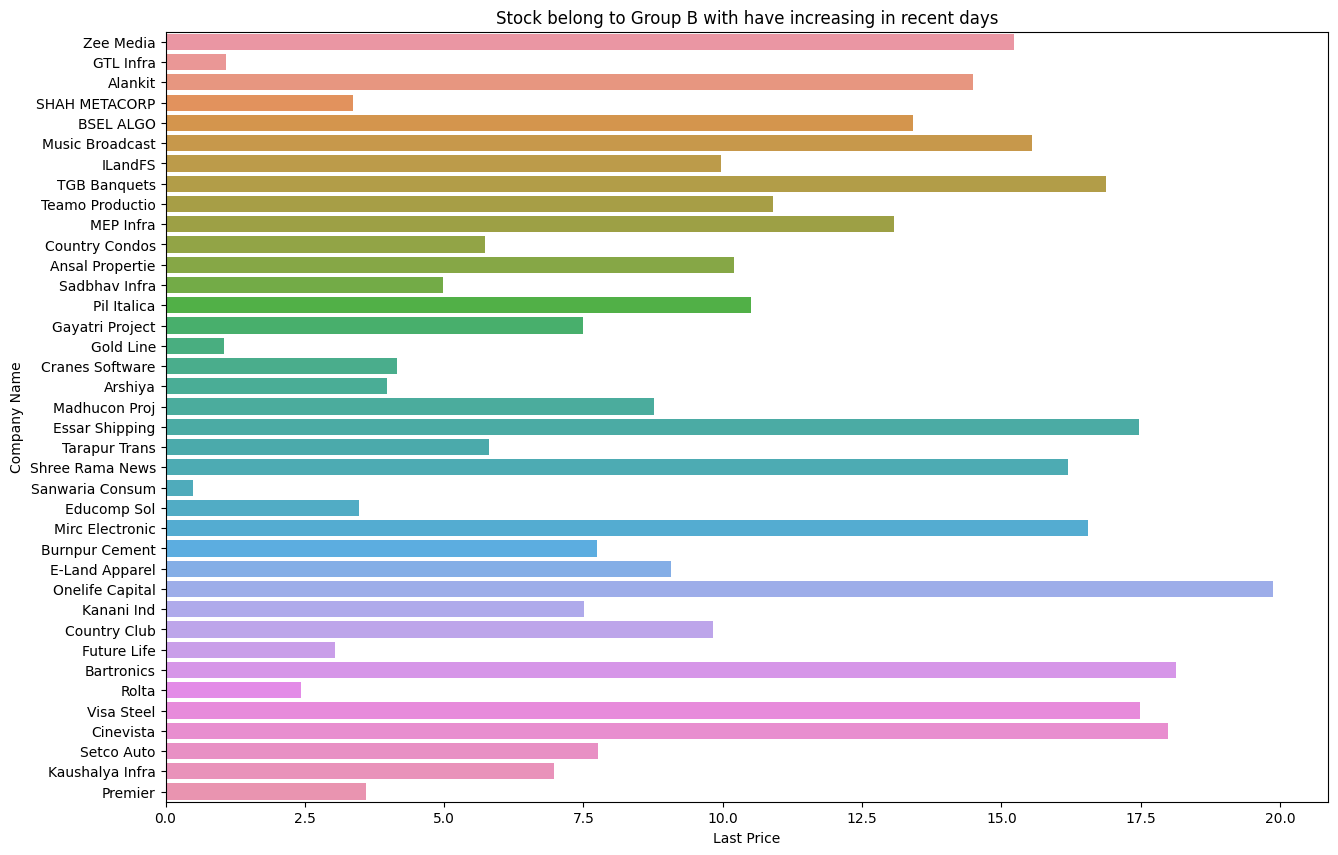

In [128]:
#Group B

plt.figure(figsize=(15,10))

sns.barplot(
    ci=False,
    data=temp3,
    y='Company Name',
    x='Last Price'
)
# plt.xticks(rotation=45)
plt.title('Stock belong to Group B with have increasing in recent days')

In [130]:
temp3=temp2.loc[temp2.Group=='B2']
temp3.head()

,Company Name,Group,High,Low,Last Price,Chg,Value
2,SEACOAST SS,B2,2.77,2.64,2.76,4.55,4.67
5,Alstone Text,B2,0.61,0.59,0.61,3.39,1.54
6,Galactico Corp,B2,4.51,4.33,4.50,3.93,1.10
7,Akshar Spintex,B2,7.64,7.30,7.64,4.95,1.07
8,KBC Global,B2,2.10,2.02,2.10,3.96,0.76


<ipython-input-131-9d88f74ae0ee>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Stock belong to Group B2 with have increasing in recent days')

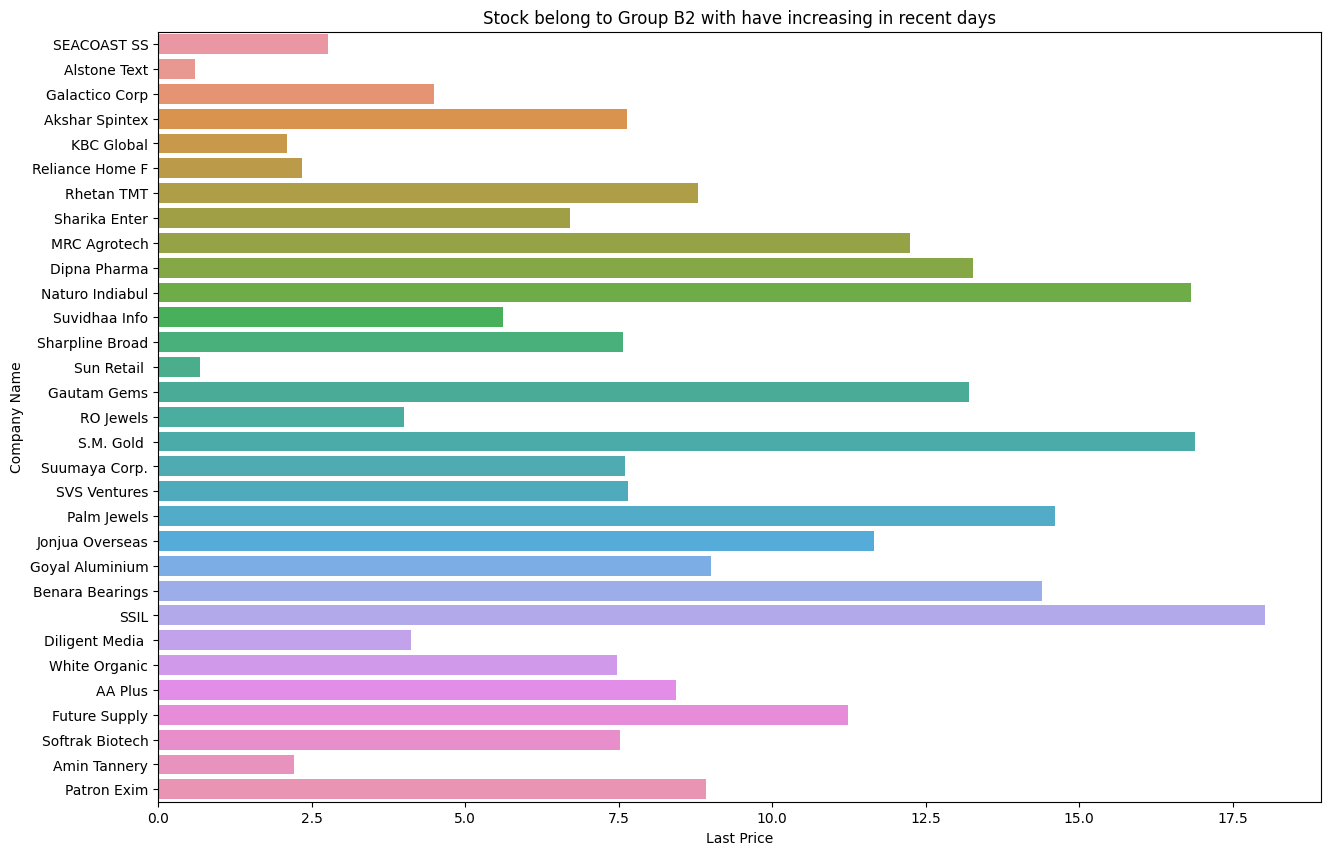

In [131]:
#Group B2

plt.figure(figsize=(15,10))

sns.barplot(
    ci=False,
    data=temp3,
    y='Company Name',
    x='Last Price'
)
# plt.xticks(rotation=45)
plt.title('Stock belong to Group B2 with have increasing in recent days')